In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('/kaggle/input/odi-data-1971-2019/ODI_data_1971-2019.csv')
df.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RL Chase,18,18,34,1.0,0.0,23,0,0,78.26,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SS Cottrell,17,17,23,1.0,0.0,18,2,1,94.44,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [5]:
df = df[df['Innings Runs Scored Num'] != '-']

In [6]:
df = df.dropna(subset=['Innings Runs Scored Num'])

In [7]:
df['Innings Date'] = pd.to_datetime(df['Innings Date']) 

In [8]:
df['Year'] = df['Innings Date'].dt.year

In [9]:
df[df.Year<=1971] .head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
171924,JH Edrich,82,82,150,1.0,0.0,119,4,0,68.9,1,v Australia,Melbourne,1971-05-01,England,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971
171925,KWR Fletcher,24,24,60,1.0,0.0,47,1,0,51.06,1,v Australia,Melbourne,1971-05-01,England,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971


In [10]:
df.dtypes

Innings Player                           object
Innings Runs Scored                      object
Innings Runs Scored Num                  object
Innings Minutes Batted                   object
Innings Batted Flag                     float64
Innings Not Out Flag                    float64
Innings Balls Faced                      object
Innings Boundary Fours                   object
Innings Boundary Sixes                   object
Innings Batting Strike Rate              object
Innings Number                           object
Opposition                               object
Ground                                   object
Innings Date                     datetime64[ns]
Country                                  object
50's                                    float64
100's                                   float64
Innings Runs Scored Buckets              object
Innings Overs Bowled                     object
Innings Bowled Flag                     float64
Innings Maidens Bowled                  

In [11]:
df['Innings Runs Scored Num'] = df['Innings Runs Scored Num'].astype(int)
df['Innings Balls Faced'] = df['Innings Balls Faced'].astype(int)
df['Innings Not Out Flag'] = df['Innings Not Out Flag'].astype(int)
df['Innings Batted Flag'] = df['Innings Batted Flag'].astype(int)

In [12]:
sachin_df = df[(df.Year>=1994) & (df.Year<=2004)]
kohli_df = df[(df.Year>=2009) & (df.Year<=2019)]

In [13]:
sachin_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
77610,V Sehwag,70,70,85,1,0,52,9,2,134.61,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1,0,32,8,3,215.62,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [14]:
sdf = df[(df.Year>=1994) & (df.Year<=2004) & (df['Innings Player']=='SR Tendulkar')]
sdf.reset_index(drop=True)
sdf.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
77614,SR Tendulkar,47,47,60,1,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77747,SR Tendulkar,19,19,46,1,0,32,3,0,59.37,1,v Bangladesh,Chattogram,2004-12-23,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [15]:
sdf['Innings Runs Scored Num'].sum()

11818

In [16]:
kdf = df[(df.Year>=2009) & (df.Year<=2019) & (df['Innings Player']=='V Kohli')]
kdf.reset_index(drop=True)
kdf.head(5)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
11,V Kohli,120,120,179,1,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
327,V Kohli,1,1,8,1,0,6,0,0,16.66,2,v New Zealand,Manchester,2019-09-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
420,V Kohli,34*,34,61,1,1,41,3,0,82.92,2,v Sri Lanka,Leeds,2019-06-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
664,V Kohli,26,26,45,1,0,27,3,0,96.29,1,v Bangladesh,Birmingham,2019-02-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
804,V Kohli,66,66,103,1,0,76,7,0,86.84,2,v England,Birmingham,2019-06-30,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [17]:
kdf['Innings Runs Scored Num'].sum()

11247

In [18]:
print("No.of innings sachin played : {0}".format(len(sdf)))
print("No.of innings kohli played  : {0}".format(len(kdf)))

No.of innings sachin played : 271
No.of innings kohli played  : 224


In [19]:
# Runs per Innings  --> Total Runs / Total Innings Played
# SR                --> (Total Runs/ TotalBalls) *100
# 100's
# 50's
# Team Contribution --> (Runs score by the player / Runs score by the team) * 100 

In [20]:
# RPI
sachin_rpi = ((sdf['Innings Runs Scored Num'].sum()) / (sdf['Innings Batted Flag'].sum())).round(2)
kohli_rpi = ((kdf['Innings Runs Scored Num'].sum()) / (kdf['Innings Batted Flag'].sum())).round(2)

sachin_rpi,kohli_rpi

(43.61, 50.21)

In [21]:
#SR
sachin_sr = (((sdf['Innings Runs Scored Num'].sum()) / ((sdf['Innings Balls Faced'].sum()))) * 100).round(2)
kohli_sr = (((kdf['Innings Runs Scored Num'].sum()) / ((kdf['Innings Balls Faced'].sum()))) * 100).round(2)

In [22]:
#100's
sachin_100 = sdf["100's"].sum()
kohli_100  = kdf["100's"].sum()

In [23]:
#50's
sachin_50 = sdf["50's"].sum()
kohli_50  = kdf["50's"].sum()

In [24]:
#Team's Contribution --> (Runs score by the player / Runs score by the team) * 100 

India_df_sachin = df[(df.Year>=1994) & (df.Year<=2004) & (df['Country']=='India')]
India_df_kohli = df[(df.Year>=2009) & (df.Year<=2019) & (df['Country']=='India')]

#1994-2004 All Indian Players Runs 
India_df_sachin['Innings Runs Scored Num'].sum()

#2009-2019 All Indian Players Runs
India_df_kohli['Innings Runs Scored Num'].sum()

63867

In [25]:
sachin_contribution = ((sdf['Innings Runs Scored Num'].sum() / (India_df_sachin['Innings Runs Scored Num'].sum())) *100).round(2)
kohli_contribution = ((kdf['Innings Runs Scored Num'].sum() / (India_df_kohli['Innings Runs Scored Num'].sum())) *100).round(2)

sachin_contribution,kohli_contribution

(16.95, 17.61)

In [26]:
print("Runs per Innings : ({0}, {1})".format(sachin_rpi,kohli_rpi))
print("SR : ({0}, {1})".format(sachin_sr,kohli_sr))
print("100's :({0}, {1})".format(sachin_100,kohli_100))
print("50's : ({0}, {1})".format(sachin_50,kohli_50))
print("Contribution : ({0}, {1})".format(sachin_contribution,kohli_contribution))

Runs per Innings : (43.61, 50.21)
SR : (88.21, 93.56)
100's :(37.0, 42.0)
50's : (57.0, 53.0)
Contribution : (16.95, 17.61)


In [27]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10)

Innings Player
SR Tendulkar      11818
SC Ganguly         9911
ST Jayasuriya      9297
Inzamam-ul-Haq     8561
R Dravid           7751
RT Ponting         7422
Saeed Anwar        7320
JH Kallis          7267
MS Atapattu        7253
MG Bevan           6912
Name: Innings Runs Scored Num, dtype: int64

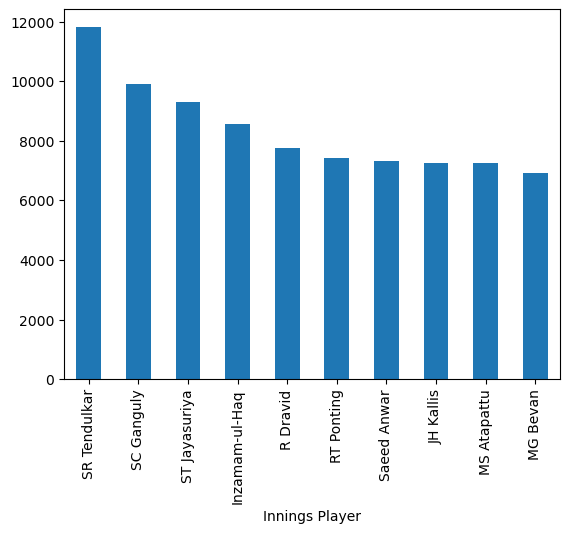

In [28]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

In [29]:
kohli_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10)

Innings Player
V Kohli           11247
RG Sharma          8083
HM Amla            7745
TM Dilshan         7296
KC Sangakkara      7275
AB de Villiers     7247
LRPL Taylor        7059
MS Dhoni           6838
EJG Morgan         6748
MJ Guptill         6626
Name: Innings Runs Scored Num, dtype: int64

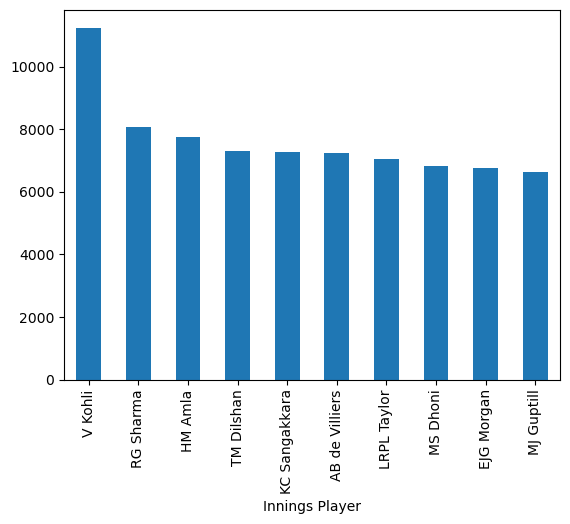

In [30]:
kohli_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

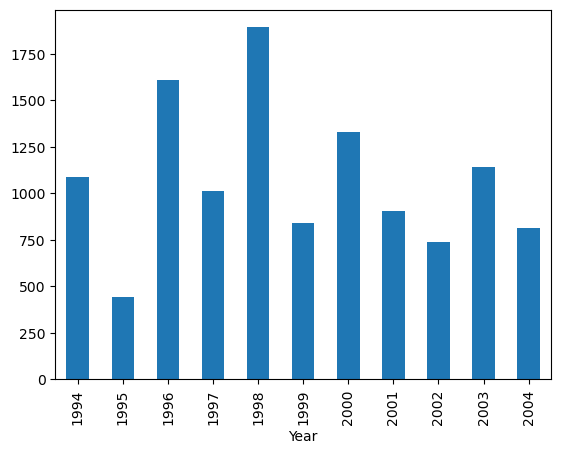

In [31]:
sdf.groupby('Year')['Innings Runs Scored Num'].sum().plot(kind='bar')
plt.show()

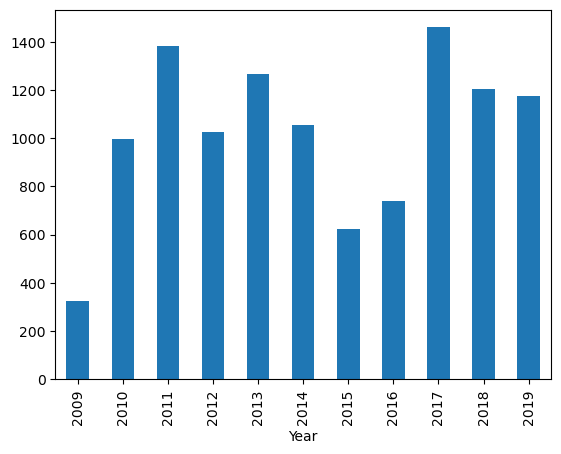

In [32]:
kdf.groupby('Year')['Innings Runs Scored Num'].sum().plot(kind='bar')
plt.show()

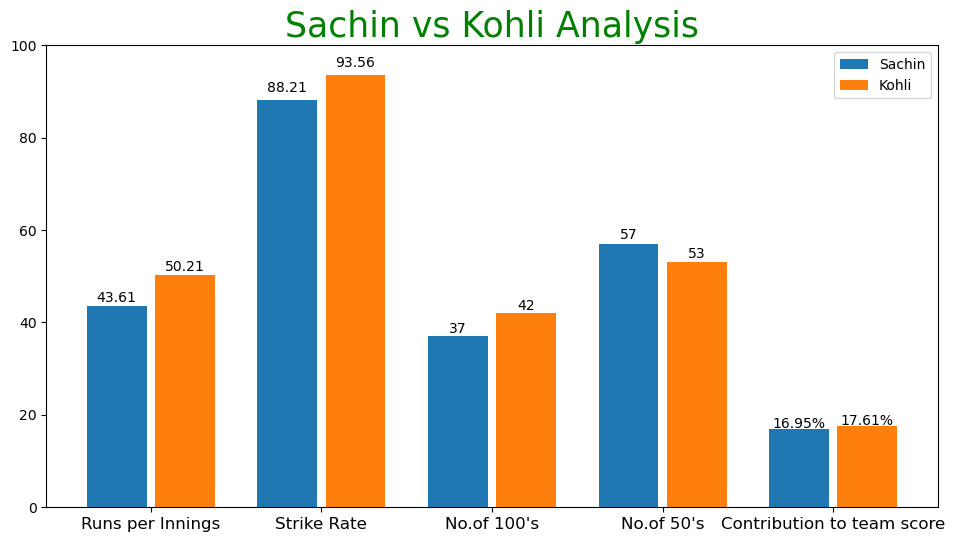

In [33]:
y = [0,20,40,60,80,100]
y_min = min(y)
y_max = max(y)

parameters = ['Runs per Innings','Strike Rate',"No.of 100's","No.of 50's",'Contribution to team score']
sachin_data = [sachin_rpi,sachin_sr,sachin_100,sachin_50,sachin_contribution]
kohli_data  = [kohli_rpi,kohli_sr,kohli_100,kohli_50,kohli_contribution]


xpos = np.arange(len(parameters))
# width = 0.35     

fig, ax = plt.subplots(figsize=(11.5,6))
rects1 = plt.bar(xpos-0.2,sachin_data,width=0.35,label='Sachin')
plt.ylim(y_min,y_max)
rects2 = plt.bar(xpos+0.2,kohli_data,width=0.35,label='Kohli')


plt.title('Sachin vs Kohli Analysis',fontsize=25,color='green')
plt.xticks(xpos,parameters,fontsize=12)

plt.legend((rects1[0], rects2[0]), ('Sachin', 'Kohli'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if((height == sachin_100) or (height == sachin_50) or (height == kohli_100) or (height == kohli_50)):
            ax.text(rect.get_x() + rect.get_width()/2., 1.018*height,
                    '%d' % int(height),ha='center')
       
        elif((height == sachin_contribution) or (height == kohli_contribution)) :
            ax.text(rect.get_x() + rect.get_width()/2., 1.018*height,
                    '%0.2f' % float(height)+'%',ha='center')
            
        else:
            ax.text(rect.get_x() + rect.get_width()/2., 1.018*height,
                    '%0.2f' % float(height),ha='center')

autolabel(rects1)
autolabel(rects2)
plt.show()

# Normalization :

In [34]:
# Sachin/Kohli avg vs Generation avg

non_sachin_df =  sachin_df[sachin_df['Innings Player'] != 'SR Tendulkar']
non_sachin_df.head()

non_kohli_df = kohli_df[kohli_df['Innings Player'] != 'V Kohli']
non_kohli_df.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
0,E Lewis,65,65,128,1,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,SO Hetmyer,18,18,31,1,0,20,2,0,90,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,RL Chase,18,18,34,1,0,23,0,0,78.26,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,SS Cottrell,17,17,23,1,0,18,2,1,94.44,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [35]:
# Scoring rate = Sachin's Rpi / Total players Rpi excluding Sachin's

Total_players_rpi = (non_sachin_df['Innings Runs Scored Num']).sum()/ (non_sachin_df['Innings Batted Flag']).sum()
sachin_scoring_rate = sachin_rpi/Total_players_rpi
sachin_scoring_rate

1.9438265361068157

In [36]:
# Scoring rate = Kohli's Rpi / Total players Rpi excluding Kohli's

Total_players_rpi = (non_kohli_df['Innings Runs Scored Num']).sum()/ (non_kohli_df['Innings Batted Flag']).sum()
kohli_scoring_rate = kohli_rpi/Total_players_rpi
kohli_scoring_rate

2.029690906630632

In [37]:
#Sachin vs Others SR

Total_players_sr = ((non_sachin_df['Innings Runs Scored Num']).sum()/ (non_sachin_df['Innings Balls Faced']).sum())*100
sachin_scoring_sr = sachin_sr/Total_players_sr
sachin_scoring_sr

1.2194129092102401

In [38]:
#Kohli vs Others SR

Total_players_sr = ((non_kohli_df['Innings Runs Scored Num']).sum()/ (non_kohli_df['Innings Balls Faced']).sum())*100
kohli_scoring_sr = kohli_sr/Total_players_sr
kohli_scoring_sr

1.1214536437798552

In [39]:
#No.of matches taken to score 100 for Sachin, Kohli

sachin_scoring_100 =(sdf['Innings Batted Flag']).sum()/(sdf["100's"]).sum()
kohli_scoring_100 =(kdf['Innings Batted Flag']).sum()/(kdf["100's"]).sum()

sachin_scoring_100,kohli_scoring_100

(7.324324324324325, 5.333333333333333)

In [40]:
#Sachin Scoring 100 vs others

sachin_scoring_100 =(sdf['Innings Batted Flag']).sum()/(sdf["100's"]).sum()
non_sachin_scoring_100 =(non_sachin_df['Innings Batted Flag']).sum()/(non_sachin_df["100's"]).sum()

sachin_scoring_100_rate = sachin_scoring_100/non_sachin_scoring_100
sachin_scoring_100_rate

0.15459346107595562

In [41]:
#Kohli Scoring 100 vs others

kohli_scoring_100 =(kdf['Innings Batted Flag']).sum()/(kdf["100's"]).sum()
non_kohli_scoring_100 =(non_kohli_df['Innings Batted Flag']).sum()/(non_kohli_df["100's"]).sum()

kohli_scoring_100_rate = kohli_scoring_100/non_kohli_scoring_100
kohli_scoring_100_rate

0.18195157740278795

In [42]:
#No.of matches taken to score 50 for Sachin, Kohli

sachin_scoring_50 =(sdf['Innings Batted Flag']).sum()/(sdf["50's"]).sum()
kohli_scoring_50 =(kdf['Innings Batted Flag']).sum()/(kdf["50's"]).sum()

sachin_scoring_50,kohli_scoring_50

(4.754385964912281, 4.226415094339623)

In [43]:
#Sachin Scoring 50 vs others

sachin_scoring_50 =(sdf['Innings Batted Flag']).sum()/(sdf["50's"]).sum()
non_sachin_scoring_50 =(non_sachin_df['Innings Batted Flag']).sum()/(non_sachin_df["50's"]).sum()

sachin_scoring_50_rate = sachin_scoring_50/non_sachin_scoring_50
sachin_scoring_50_rate

0.5702402203539483

In [44]:
#Kohli Scoring 50 vs others

kohli_scoring_50 =(kdf['Innings Batted Flag']).sum()/(kdf["50's"]).sum()
non_kohli_scoring_50 =(non_kohli_df['Innings Batted Flag']).sum()/(non_kohli_df["50's"]).sum()

kohli_scoring_50_rate = kohli_scoring_50/non_kohli_scoring_50
kohli_scoring_50_rate

0.5507828181453231

In [45]:
sachin_contribution = (sdf['Innings Runs Scored Num'].sum() / (India_df_sachin['Innings Runs Scored Num'].sum())) *100
kohli_contribution = (kdf['Innings Runs Scored Num'].sum() / (India_df_kohli['Innings Runs Scored Num'].sum())) *100

sachin_contribution,kohli_contribution

(16.951875493078962, 17.610033350556627)

In [46]:
print("Scoring Runs : ({0}, {1})".format(sachin_scoring_rate.round(2),kohli_scoring_rate.round(2)))
print("Scoring SR : ({0}, {1})".format(sachin_scoring_sr.round(2),kohli_scoring_sr.round(2)))
print("No.of innings taken to score 100 : ({0}, {1})".format(sachin_scoring_100.round(2),kohli_scoring_100.round(2)))
print("No.of innings taken to score 50 : ({0}, {1})".format(sachin_scoring_50.round(2),kohli_scoring_50.round(2)))
print("Scoring 100 rate vs others : ({0}, {1})".format(sachin_scoring_100_rate.round(2),kohli_scoring_100_rate.round(2)))
print("Scoring 50 rate vs others : ({0}, {1})".format(sachin_scoring_50_rate.round(2),kohli_scoring_50_rate.round(2)))
print("Contribution to team's score : ({0}, {1})".format(sachin_contribution.round(2),kohli_contribution.round(2)))

Scoring Runs : (1.94, 2.03)
Scoring SR : (1.22, 1.12)
No.of innings taken to score 100 : (7.32, 5.33)
No.of innings taken to score 50 : (4.75, 4.23)
Scoring 100 rate vs others : (0.15, 0.18)
Scoring 50 rate vs others : (0.57, 0.55)
Contribution to team's score : (16.95, 17.61)


# *Rohit vs Kohli* 

In [47]:
kohli_df_since_2013 = df[df['Innings Player'] == 'V Kohli']
kohli_df_since_2013 = kohli_df_since_2013[kohli_df_since_2013.Year >= 2013]
len(kohli_df_since_2013)

141

In [48]:
rohit_df_since_2013 = df[df['Innings Player'] == 'RG Sharma']
rohit_df_since_2013 = rohit_df_since_2013[rohit_df_since_2013.Year >= 2013]
len(rohit_df_since_2013)

129

In [49]:
rohit_df_since_2013['Innings Runs Scored Num'].sum()

6698

In [50]:
kohli_df_since_2013['Innings Runs Scored Num'].sum()

7520

In [51]:
# Runs per Innings  --> Total Runs / Total Innings Played
# SR                --> (Total Runs/ TotalBalls) *100
# 100's
# 50's
# Team Contribution --> (Runs score by the player / Runs score by the team) * 100 

In [52]:
#RPI

kohli_rpi_since_2013 = (kohli_df_since_2013['Innings Runs Scored Num'].sum()/ kohli_df_since_2013['Innings Batted Flag'].sum()).round(2)
rohit_rpi_since_2013 = (rohit_df_since_2013['Innings Runs Scored Num'].sum()/ rohit_df_since_2013['Innings Batted Flag'].sum()).round(2)

kohli_rpi_since_2013,rohit_rpi_since_2013

(53.33, 51.92)

In [53]:
#SR

kohli_sr_since_2013 = (kohli_df_since_2013['Innings Runs Scored Num'].sum()/ kohli_df_since_2013['Innings Balls Faced'].sum()* 100).round(2)
rohit_sr_since_2013 = (rohit_df_since_2013['Innings Runs Scored Num'].sum()/ rohit_df_since_2013['Innings Balls Faced'].sum()* 100).round(2)

kohli_sr_since_2013,rohit_sr_since_2013

(96.92, 92.23)

In [54]:
#100's

kohli_100_since_2013 = kohli_df_since_2013["100's"].sum()
rohit_100_since_2013 = rohit_df_since_2013["100's"].sum()

kohli_100_since_2013,rohit_100_since_2013

(29.0, 25.0)

In [55]:
  #50's

kohli_50_since_2013 = kohli_df_since_2013["50's"].sum()
rohit_50_since_2013 = rohit_df_since_2013["50's"].sum()

kohli_50_since_2013,rohit_50_since_2013

(33.0, 30.0)

In [56]:
# Team Contribution 

India_df_since_2013 = df[df['Country'] == 'India']
India_df_since_2013 = India_df_since_2013[India_df_since_2013.Year>= 2013] 
India_df_since_2013.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
11,V Kohli,120,120,179,1,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
12,SS Iyer,71,71,101,1,0,68,5,1,104.41,1,v West Indies,Port of Spain,2019-11-08,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [57]:
India_df_since_2013_without_kohli = India_df_since_2013[India_df_since_2013['Innings Player'] != 'V Kohli']
India_df_since_2013_without_kohli.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
12,SS Iyer,71,71,101,1,0,68,5,1,104.41,1,v West Indies,Port of Spain,2019-11-08,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
13,RR Pant,20,20,27,1,0,35,2,0,57.14,1,v West Indies,Port of Spain,2019-11-08,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [58]:
India_df_since_2013_without_rohit = India_df_since_2013[India_df_since_2013['Innings Player'] != 'RG Sharma']
India_df_since_2013_without_rohit.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
11,V Kohli,120,120,179,1,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
12,SS Iyer,71,71,101,1,0,68,5,1,104.41,1,v West Indies,Port of Spain,2019-11-08,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [59]:
India_df_since_2013_without_kohli['Innings Runs Scored Num'].sum()

31474

In [60]:
India_df_since_2013_without_rohit['Innings Runs Scored Num'].sum()

32296

In [61]:
kohli_contribution_since_2013 = ((kohli_df_since_2013['Innings Runs Scored Num'].sum() / India_df_since_2013_without_kohli['Innings Runs Scored Num'].sum())*100).round(2)
kohli_contribution_since_2013

23.89

In [62]:
rohit_contribution_since_2013 = ((rohit_df_since_2013['Innings Runs Scored Num'].sum() / India_df_since_2013_without_rohit['Innings Runs Scored Num'].sum())*100).round(2)
rohit_contribution_since_2013

20.74

In [63]:
all_countries_df_since_2013 = df[df.Year>= 2013]
all_countries_df_since_2013.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
0,E Lewis,65,65,128,1,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [64]:
all_countries_df_since_2013.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10)

Innings Player
V Kohli          7520
RG Sharma        6698
JE Root          5856
S Dhawan         5413
KS Williamson    5310
LRPL Taylor      4968
F du Plessis     4944
Q de Kock        4907
HM Amla          4897
EJG Morgan       4743
Name: Innings Runs Scored Num, dtype: int64

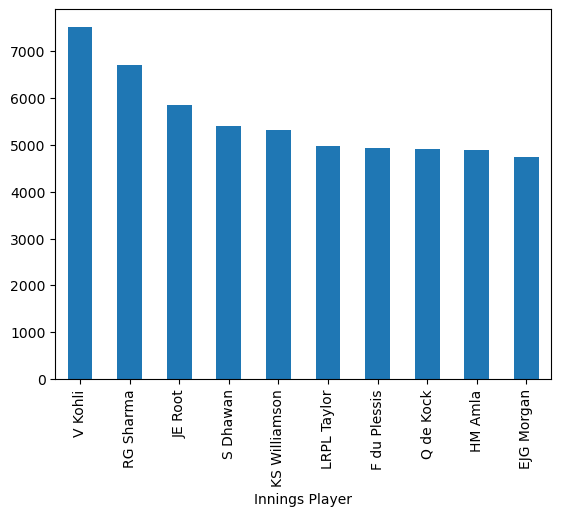

In [65]:
all_countries_df_since_2013.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

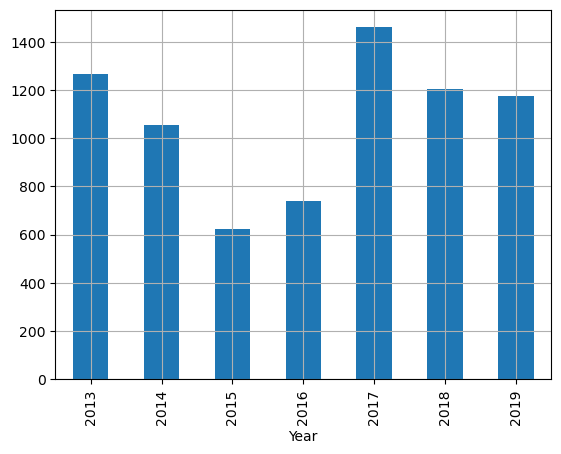

In [66]:
kohli_df_since_2013.groupby('Year')['Innings Runs Scored Num'].sum().plot(kind='bar')
plt.grid()
plt.show()

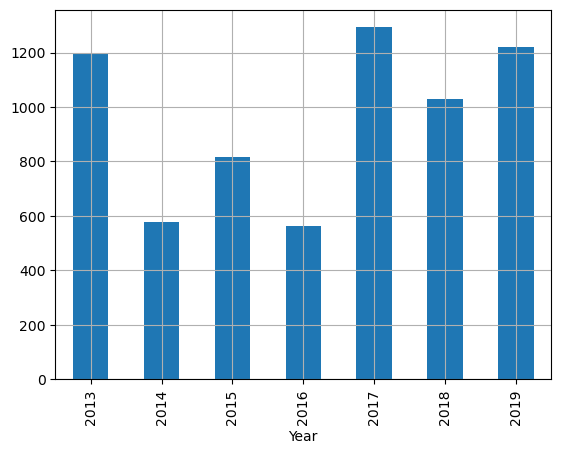

In [67]:
rohit_df_since_2013.groupby('Year')['Innings Runs Scored Num'].sum().plot(kind='bar')
plt.grid()
plt.show()

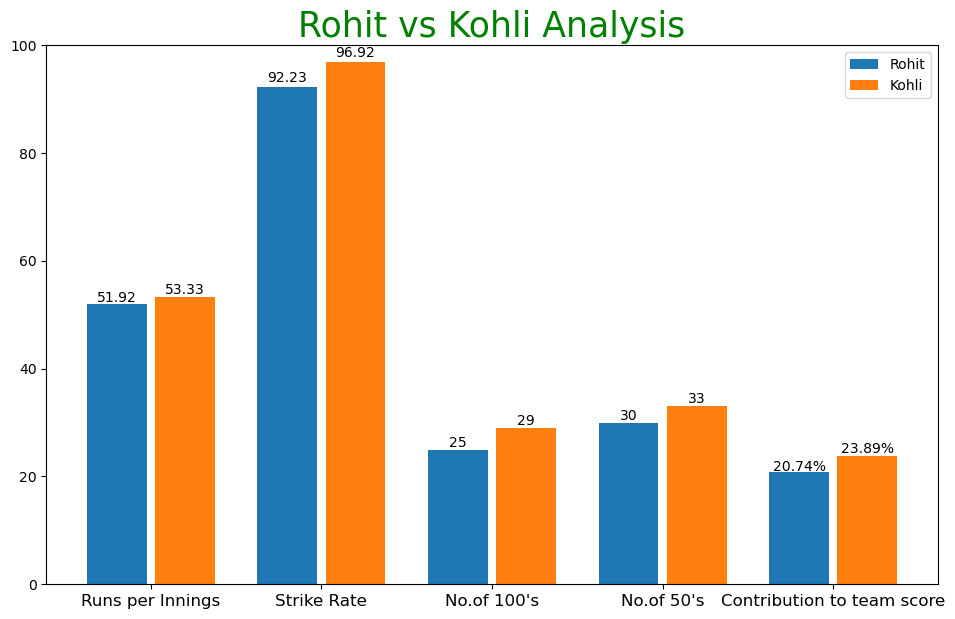

In [68]:
y = [0,20,40,60,80,100]
y_min = min(y)
y_max = max(y)

parameters = ['Runs per Innings','Strike Rate',"No.of 100's","No.of 50's",'Contribution to team score']
rohit_data = [rohit_rpi_since_2013,rohit_sr_since_2013,rohit_100_since_2013,rohit_50_since_2013,rohit_contribution_since_2013]
kohli_data  = [kohli_rpi_since_2013,kohli_sr_since_2013,kohli_100_since_2013,kohli_50_since_2013,kohli_contribution_since_2013]


xpos = np.arange(len(parameters))
# width = 0.35     

fig, ax = plt.subplots(figsize=(11.5,7))
rects1 = plt.bar(xpos-0.2,rohit_data,width=0.35,label='Rohit')
plt.ylim(y_min,y_max)
rects2 = plt.bar(xpos+0.2,kohli_data,width=0.35,label='Kohli')


plt.title('Rohit vs Kohli Analysis',fontsize=25,color='green')
plt.xticks(xpos,parameters,fontsize=12)

plt.legend((rects1[0], rects2[0]), ('Rohit', 'Kohli'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if((height == rohit_100_since_2013) or (height == rohit_50_since_2013) or (height == kohli_100_since_2013) or (height == kohli_50_since_2013)):
            ax.text(rect.get_x() + rect.get_width()/2., 1.018*height,
                    '%d' % int(height),ha='center')
       
        elif((height == rohit_contribution_since_2013) or (height == kohli_contribution_since_2013)) :
            ax.text(rect.get_x() + rect.get_width()/2., 1.018*height,
                    '%0.2f' % float(height)+'%',ha='center')
            
        else:
            ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                    '%0.2f' % float(height),ha='center')

autolabel(rects1)
autolabel(rects2)
plt.show()